In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)

1.14.0-rc1


In [0]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data('imdb.npz',num_words=15000)

In [0]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [0]:
print("Training entries: {}, labels: {}".format(len(test_data), len(test_data)))

Training entries: 25000, labels: 25000


In [0]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
len(train_data[0]), len(train_data[1]),len(train_data[2])

(218, 189, 141)

In [0]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [0]:
decode_review(train_data[20])

"<START> shown in australia as <UNK> this incredibly bad movie is so bad that you become <UNK> and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school <UNK> class the sets are pathetic but marginally better than the <UNK> and the acting is wooden br br the infant <UNK> seems to have been stolen from the props <UNK> of <UNK> <UNK> there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money"

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [0]:
train_data[0]

array([    1,    14,    22,    16,    43,   530,   973,  1622,  1385,
          65,   458,  4468,    66,  3941,     4,   173,    36,   256,
           5,    25,   100,    43,   838,   112,    50,   670,     2,
           9,    35,   480,   284,     5,   150,     4,   172,   112,
         167,     2,   336,   385,    39,     4,   172,  4536,  1111,
          17,   546,    38,    13,   447,     4,   192,    50,    16,
           6,   147,  2025,    19,    14,    22,     4,  1920,  4613,
         469,     4,    22,    71,    87,    12,    16,    43,   530,
          38,    76,    15,    13,  1247,     4,    22,    17,   515,
          17,    12,    16,   626,    18,     2,     5,    62,   386,
          12,     8,   316,     8,   106,     5,     4,  2223,  5244,
          16,   480,    66,  3785,    33,     4,   130,    12,    16,
          38,   619,     5,    25,   124,    51,    36,   135,    48,
          25,  1415,    33,     6,    22,    12,   215,    28,    77,
          52,     5,

In [0]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [0]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 15000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
#model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 16)          240000    
_________________________________________________________________
global_average_pooling1d_19  (None, 16)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_19 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 17        
Total params: 240,289
Trainable params: 240,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [0]:
#每一Epochs都进行F1计算
import numpy as np
from tensorflow.keras.callbacks import Callback
from keras.engine.training import Model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
    #def __init__(self, validation_data=None):
    #    super()
    #    if validation_data is not None:
    #      self.validation_data = validation_data
      
    def set_validation_data(self, validation_data):
        self.validation_data = validation_data  
     
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
 
      
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict,average='weighted')
        _val_recall = recall_score(val_targ, val_predict,average='weighted')
        _val_precision = precision_score(val_targ, val_predict,average='weighted')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print( ' — val_f1: %f — val_precision: %f — val_recall %f' %(_val_f1, _val_precision, _val_recall))
        return
    
metrics = Metrics()
metrics.set_validation_data((x_val, y_val))

In [0]:
from keras.callbacks import EarlyStopping
earlystopping= keras.callbacks.EarlyStopping(monitor='val_acc', patience=8, verbose=0, mode='max')
np.random.seed(7)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=90,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[metrics,earlystopping],
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/90
15000/15000 [==============================] - 3s 193us/sample - loss: 0.6919 - acc: 0.5547 - val_loss: 0.6905 - val_acc: 0.6181
Epoch 2/90
15000/15000 [==============================] - 2s 101us/sample - loss: 0.6876 - acc: 0.6138 - val_loss: 0.6843 - val_acc: 0.7006
Epoch 3/90
15000/15000 [==============================] - 2s 102us/sample - loss: 0.6776 - acc: 0.6899 - val_loss: 0.6714 - val_acc: 0.7604
Epoch 4/90
15000/15000 [==============================] - 2s 101us/sample - loss: 0.6597 - acc: 0.7157 - val_loss: 0.6496 - val_acc: 0.7749
Epoch 5/90
15000/15000 [==============================] - 1s 99us/sample - loss: 0.6325 - acc: 0.7450 - val_loss: 0.6192 - val_acc: 0.7890
Epoch 6/90
15000/15000 [==============================] - 2s 102us/sample - loss: 0.5971 - acc: 0.7706 - val_loss: 0.5822 - val_acc: 0.8059
Epoch 7/90
15000/15000 [==============================] - 2s 100us/sample - loss: 0.5569 - acc: 0.7909 - val_lo

In [0]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 54us/sample - loss: 0.3140 - acc: 0.8762
[0.31400525485515596, 0.8762]


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

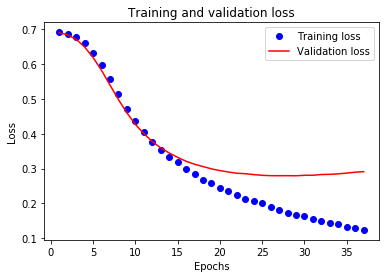

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

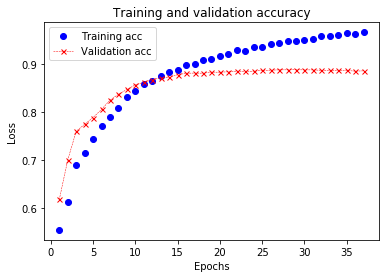

In [0]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, color='red', marker='x', linestyle='dashed',
        linewidth=0.5, markersize=5,label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()